In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score
from sklearn.preprocessing import LabelEncoder

In [ ]:
%cd /content/drive/MyDrive/Machine Learning/drugs classsification

/content/drive/MyDrive/Machine Learning/drugs classsification


In [ ]:
data=pd.read_csv('drug200.csv')

In [ ]:
data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [ ]:
data['Cholesterol'].unique()

array(['HIGH', 'NORMAL'], dtype=object)

In [ ]:
data['Drug'].unique()

array(['DrugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

In [ ]:
labelencode=LabelEncoder()
data['Drug']=labelencode.fit_transform(data['Drug'])

In [ ]:
data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,0
1,47,M,LOW,HIGH,13.093,3
2,47,M,LOW,HIGH,10.114,3
3,28,F,NORMAL,HIGH,7.798,4
4,61,F,LOW,HIGH,18.043,0


In [ ]:
data['Cholesterol']=[1 if i=='HIGH' else 0 for i in data['Cholesterol']]

In [ ]:
data['Sex']=[1 if i=='F' else 0 for i in data['Sex']]

In [ ]:
data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,1,HIGH,1,25.355,0
1,47,0,LOW,1,13.093,3
2,47,0,LOW,1,10.114,3
3,28,1,NORMAL,1,7.798,4
4,61,1,LOW,1,18.043,0


In [ ]:
data['BP']=labelencode.fit_transform(data['BP'])

In [ ]:
data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,1,0,1,25.355,0
1,47,0,1,1,13.093,3
2,47,0,1,1,10.114,3
3,28,1,2,1,7.798,4
4,61,1,1,1,18.043,0


In [ ]:
corel=data.corr()

In [ ]:
x=data.drop('Drug',axis=1)
y=data['Drug']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
model=RandomForestClassifier(n_estimators=100,random_state=42)

In [ ]:
model.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred=model.predict(x_test)

In [ ]:
accuracy=accuracy_score(y_test,y_pred)
recall=recall_score(y_test,y_pred,average='macro')
precision=precision_score(y_test,y_pred,average='macro')
conf=confusion_matrix(y_test,y_pred)

In [ ]:
print(f'accuracy= {accuracy*100} %')
print(f'recall= {recall*100} %')
print(f'precision= {precision*100} %')

accuracy= 100.0 %
recall= 100.0 %
precision= 100.0 %


<Axes: >

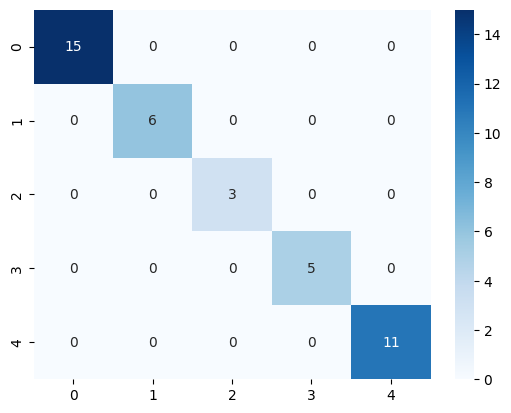

In [ ]:
sns.heatmap(conf,annot=True,cmap='Blues')